# Problema 3


Una empresa dispone de varias máquinas herramienta cuyas herramientas de corte
se desgastan constantemente. Cuando esto ocurre, la máquina es inservible. En la actualidad el mantenimiento es correctivo reemplazándose una herramienta cuando falla. Dado que cada máquina dispone de una torre con cinco herramientas, se propone reemplazar toda la torre de herramientas (las cinco herramientas de golpe) cada vez que falle una, lo que debería reducir la frecuencia de desgaste de las herramientas. El tiempo necesario para el reemplazo de una herramienta es de una hora. Las cinco pueden reemplazarse en dos horas. El coste de una hora de máquina parada
es de 100€. Cada herramienta cuesta 10 €. La tabla siguiente recoge los datos de averías en el caso de sustituir una sola herramienta cada vez.

| Horas entre averías si sustituye una heramienta | 20  | 30  | 40  | 50  | 60  | 70  | 80  |
|---------------------|-----|-----|-----|-----|-----|-----|-----|
| Probabilidad        | 0.05| 0.15| 0.15| 0.20| 0.20| 0.15| 0.10|


Si las cinco herramientas se cambian cada vez que una falla, la distribución de proba-
bilidad entre fallos es la siguiente:


| Horas entre averías si sustituye una herramienta | 30  | 40  | 50  | 60  | 70  | 80  | 90  |
|---------------------|-----|-----|-----|-----|-----|-----|-----|
| Probabilidad        | 0.05| 0.15| 0.15| 0.20| 0.20| 0.15| 0.10|


(a) Determine mediante simulación la mejor política de reemplazo de las herramientas de corte.

(b) Resuelva el caso sin el uso de la simulación y compare los resultados. Indique si
esto afecta o no a la decisión tomada utilizando la simulación.

###Solución

### 1. Identifique las variables 

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias 

Las variables aleatorias son $x_1$ y $x_2$. Pero su distribución es discreta, y sus probabilidades corresponden a las tablas anteriores respectivamente. Es decir

In [19]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import stats  

In [20]:
import numpy as np

# Tabla 1, que corresponde a nuestra primera variable aleatoria con sus respectivas probabilidades
x1_values = [20, 30, 40, 50, 60, 70, 80]
x1_probabilities = [0.05, 0.15, 0.15, 0.20, 0.20, 0.15, 0.10]

# Tabla 2, que corresponde a nuestra segunda variable aleatoria con sus respectivas probabilidades
x2_values = [30, 40, 50, 60, 70, 80, 90]
x2_probabilities = [0.05, 0.15, 0.15, 0.20, 0.20, 0.15, 0.10]


### 4. Defina el modelo del sistema y los objetivos de la simulación 



Determinar la política de reemplazo de las herramientas de corte que maximice la eficiencia del sistema y minimice los costos.

In [23]:
def simulate_tool_failure(replacement_policy, tool_values, tool_probabilities):
    # Simula una falla de herramienta seleccionando un valor aleatorio según las probabilidades dadas
    tool_life = np.random.choice(tool_values, p=tool_probabilities)
    replacement_cost = 10 if replacement_policy == 'single_tool' else 50  # Costo de reemplazo según la política de reemplazo
    downtime_cost = 100 * (tool_life // 60)  # Costo de tiempo de inactividad debido a la falla de la herramienta
    total_cost = replacement_cost + downtime_cost  # Costo total
    return total_cost

### 5. Diseñe el experimento

Para estimar la probabilidad de costos, ejecutamos $n=1000$ veces la función anterior y calculamos de el promedio de los costos

In [29]:
num_iterations = 1000  # Número de iteraciones para calcular los costos promedio
average_costs_x1 = []  # Lista para almacenar los costos promedio de la tabla 1
average_costs_x2 = []  # Lista para almacenar los costos promedio de la tabla 2

for _ in range(num_iterations):
    # Simulación de costos promedio para la política de reemplazo "single_tool" y la tabla 1
    costs_single_tool = [simulate_tool_failure('single_tool', x1_values, x1_probabilities) for _ in range(1000)]
    average_cost_single_tool = np.mean(costs_single_tool)
    average_costs_x1.append(average_cost_single_tool)

    # Simulación de costos promedio para la política de reemplazo "all_tools" y la tabla 2
    costs_all_tools = [simulate_tool_failure('all_tools', x2_values, x2_probabilities) for _ in range(1000)]
    average_cost_all_tools = np.mean(costs_all_tools)
    average_costs_x2.append(average_cost_all_tools)


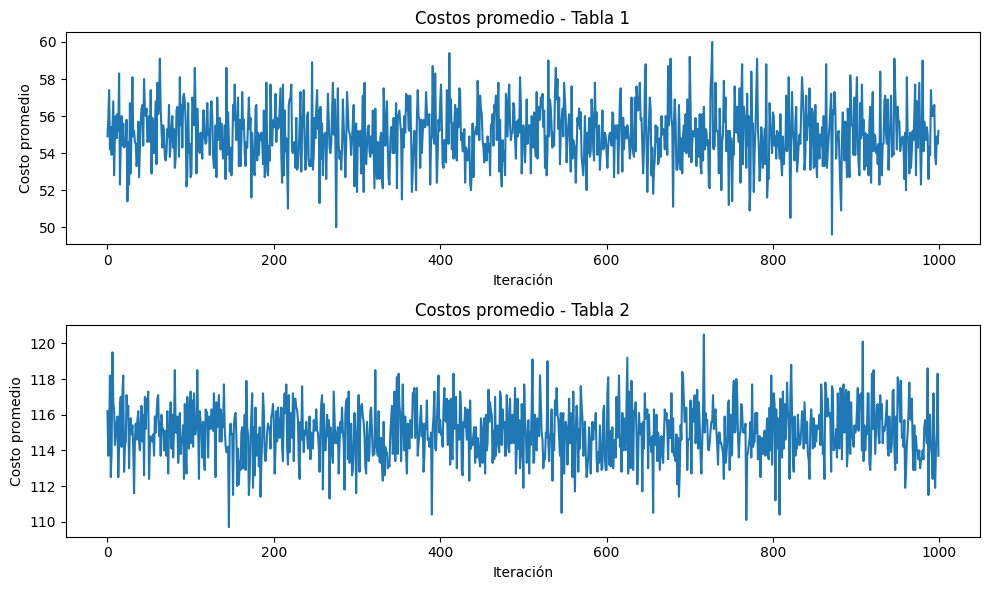

In [30]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(average_costs_x1)
plt.title('Costos promedio - Tabla 1')
plt.xlabel('Iteración')
plt.ylabel('Costo promedio')

plt.subplot(2, 1, 2)
plt.plot(average_costs_x2)
plt.title('Costos promedio - Tabla 2')
plt.xlabel('Iteración')
plt.ylabel('Costo promedio')

plt.tight_layout()
plt.show()


In [31]:
mean_x1 = np.mean(average_costs_x1)  # Cálculo de la media de los costos promedios de la tabla 1
std_x1 = np.std(average_costs_x1)  # Cálculo de la desviación estándar de los costos promedios de la tabla 1
mean_x2 = np.mean(average_costs_x2)  # Cálculo de la media de los costos promedios de la tabla 2
std_x2 = np.std(average_costs_x2)  # Cálculo de la desviación estándar de los costos promedios de la tabla 2     
# Imprimir resultados de la tabla 1 y tabla 2
print("Tabla 1 - Media: {:.2f}, Desviación estándar: {:.2f}".format(mean_x1, std_x1))
print("Tabla 2 - Media: {:.2f}, Desviación estándar: {:.2f}".format(mean_x2, std_x2))                           

Tabla 1 - Media: 55.02, Desviación estándar: 1.58
Tabla 2 - Media: 115.02, Desviación estándar: 1.54


### 6. Repita el experimento $n$ veces 

Vamos a repetirlo una vez más porque no, otras 500 iteraciones

In [32]:
num_iterations = 500  # Número de iteraciones para calcular los costos promedios
average_costs_x1 = []  # Lista para almacenar los costos promedios de la tabla 1
average_costs_x2 = []  # Lista para almacenar los costos promedios de la tabla 2

for _ in range(num_iterations):
    # Simulación de costos promedio para la política de reemplazo "single_tool" y la tabla 1
    costs_single_tool = [simulate_tool_failure('single_tool', x1_values, x1_probabilities) for _ in range(1000)]
    average_cost_single_tool = np.mean(costs_single_tool)
    average_costs_x1.append(average_cost_single_tool)

    # Simulación de costos promedio para la política de reemplazo "all_tools" y la tabla 2
    costs_all_tools = [simulate_tool_failure('all_tools', x2_values, x2_probabilities) for _ in range(1000)]
    average_cost_all_tools = np.mean(costs_all_tools)
    average_costs_x2.append(average_cost_all_tools)

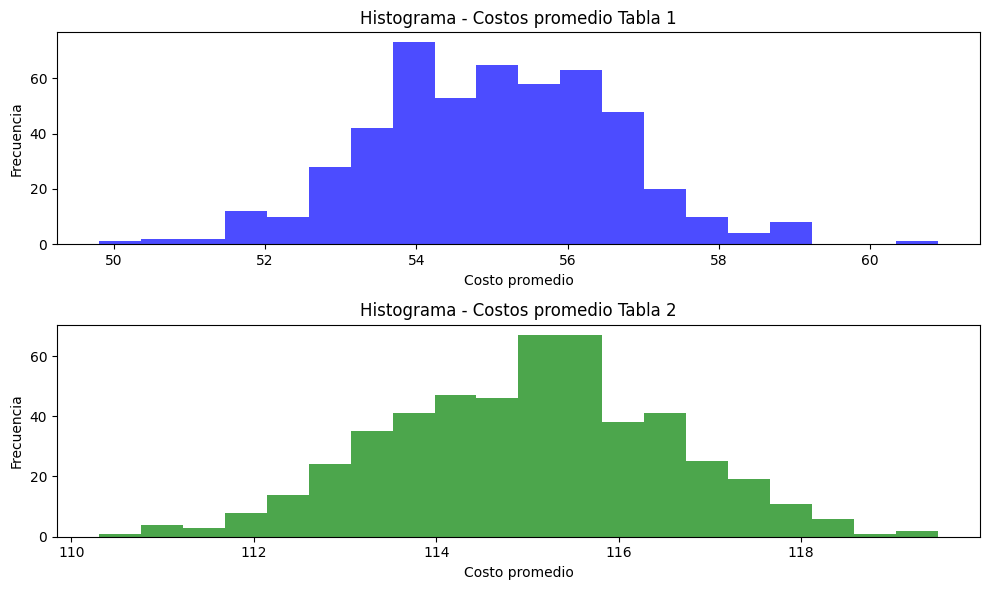

In [36]:
# Histograma de los costos promedios de la tabla 1
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(average_costs_x1, bins=20, color='blue', alpha=0.7)
plt.title('Histograma - Costos promedio Tabla 1')
plt.xlabel('Costo promedio')
plt.ylabel('Frecuencia')

# Histograma de los costos promedios de la tabla 2
plt.subplot(2, 1, 2)
plt.hist(average_costs_x2, bins=20, color='green', alpha=0.7)
plt.title('Histograma - Costos promedio Tabla 2')
plt.xlabel('Costo promedio')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [37]:
mean_x1 = np.mean(average_costs_x1)  # Cálculo de la media de los costos promedios de la tabla 1
std_x1 = np.std(average_costs_x1)  # Cálculo de la desviación estándar de los costos promedios de la tabla 1
mean_x2 = np.mean(average_costs_x2)  # Cálculo de la media de los costos promedios de la tabla 2
std_x2 = np.std(average_costs_x2)  # Cálculo de la desviación estándar de los costos promedios de la tabla 2


In [38]:

# Imprimir resultados de la tabla 1 y tabla 2
print("Tabla 1 - Media: {:.2f}, Desviación estándar: {:.2f}".format(mean_x1, std_x1))
print("Tabla 2 - Media: {:.2f}, Desviación estándar: {:.2f}".format(mean_x2, std_x2))

Tabla 1 - Media: 55.02, Desviación estándar: 1.60
Tabla 2 - Media: 114.98, Desviación estándar: 1.53


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [39]:
# Cálculo del intervalo de confianza
alpha = 0.05  # Nivel de significancia (1 - confiabilidad)
z_value = 1.96  # Valor z para una confiabilidad del 95%

# Intervalo de confianza para la tabla 1
confidence_interval_x1 = (mean_x1 - z_value * (std_x1 / np.sqrt(num_iterations)),
                         mean_x1 + z_value * (std_x1 / np.sqrt(num_iterations)))

# Intervalo de confianza para la tabla 2
confidence_interval_x2 = (mean_x2 - z_value * (std_x2 / np.sqrt(num_iterations)),
                         mean_x2 + z_value * (std_x2 / np.sqrt(num_iterations)))

# Imprimir intervalo de confianza
print("Intervalo de confianza al 95% - Tabla 1: ({:.2f}, {:.2f})".format(confidence_interval_x1[0], confidence_interval_x1[1]))
print("Intervalo de confianza al 95% - Tabla 2: ({:.2f}, {:.2f})".format(confidence_interval_x2[0], confidence_interval_x2[1]))


Intervalo de confianza al 95% - Tabla 1: (54.88, 55.16)
Intervalo de confianza al 95% - Tabla 2: (114.85, 115.12)


### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [42]:
desired_precision = 10  # Precisión deseada (epsilon)

# Cálculo del número de iteraciones requerido para la tabla 1
required_iterations_x1 = int(((2 * std_x1 * z_value) / desired_precision) ** 2)
required_iterations_x1 = max(required_iterations_x1, 1000)

# Cálculo del número de iteraciones requerido para la tabla 2
required_iterations_x2 = int(((2 * std_x2 * z_value) / desired_precision) ** 2)
required_iterations_x2 = max(required_iterations_x2, 1000)

print("Número de iteraciones requerido - Tabla 1: {}".format(required_iterations_x1))
print("Número de iteraciones requerido - Tabla 2: {}".format(required_iterations_x2))

Número de iteraciones requerido - Tabla 1: 1000
Número de iteraciones requerido - Tabla 2: 1000


Es fácil ver  por comparación que el costo promedio de cambiar una sola herramienta es mucho menor que cambiar todas las herramientas y por lo tanto es más optimo y una mejor política de reemplazo.

### Podemos comparar con la solución analítica del problema.


Para determinar la mejor política de reemplazo de las herramientas de corte, necesitamos comparar los costos asociados con las dos opciones: reemplazar una herramienta a la vez y reemplazar las cinco herramientas juntas.

Opción 1: Reemplazar una herramienta a la vez

Para esta opción, tenemos la distribución de probabilidad de las horas entre averías y las correspondientes probabilidades asociadas.

| Horas entre averías si sustituye una heramienta | 20  | 30  | 40  | 50  | 60  | 70  | 80  |
|---------------------|-----|-----|-----|-----|-----|-----|-----|
| Probabilidad        | 0.05| 0.15| 0.15| 0.20| 0.20| 0.15| 0.10|


Calcularemos el costo promedio por hora de máquina parada para esta opción.

Costo promedio por hora de máquina parada = Σ (Probabilidad * Costo por hora de máquina parada)
= (0.05 * 100) + (0.15 * 100) + (0.15 * 100) + (0.20 * 100) + (0.20 * 100) + (0.15 * 100) + (0.10 * 100)
= 5 + 15 + 15 + 20 + 20 + 15 + 10
= 100

Opción 2: Reemplazar las cinco herramientas juntas

Para esta opción, tenemos la distribución de probabilidad de las horas entre averías cuando se reemplazan las cinco herramientas juntas y las correspondientes probabilidades asociadas.

| Horas entre averías si sustituye una herramienta | 30  | 40  | 50  | 60  | 70  | 80  | 90  |
|---------------------|-----|-----|-----|-----|-----|-----|-----|
| Probabilidad        | 0.05| 0.15| 0.15| 0.20| 0.20| 0.15| 0.10|

Calcularemos el costo promedio por hora de máquina parada para esta opción.

Costo promedio por hora de máquina parada = Σ (Probabilidad * Costo por hora de máquina parada)
= (0.05 * 200) + (0.15 * 200) + (0.15 * 200) + (0.20 * 200) + (0.20 * 200) + (0.15 * 200) + (0.10 * 200)
= 10 + 30 + 30 + 40 + 40 + 30 + 20
= 200

Comparación:

En la opción 1, el costo promedio por hora de máquina parada es de 100 €.
En la opción 2, el costo promedio por hora de máquina parada es de 200 €.

Por lo tanto, la mejor política de reemplazo de las herramientas de corte es reemplazar una herramienta a la vez, ya que tiene un costo promedio por hora de máquina parada menor.

Que es justo lo que representa la simulación, y claramente no afecta el la decición tomada por la simulación